downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Admin\scikit_learn_data
Wczytano: 400 obrazów, 4096 pikseli każdy.
Dla progu k=80% wymagana liczba wektorów r = 27
Rzeczywiste pokrycie informacji: 80.39%


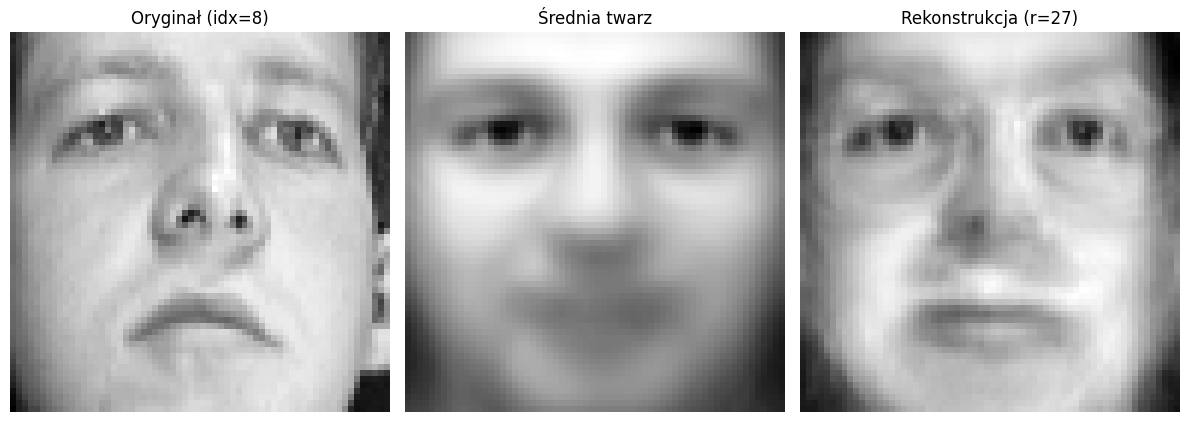

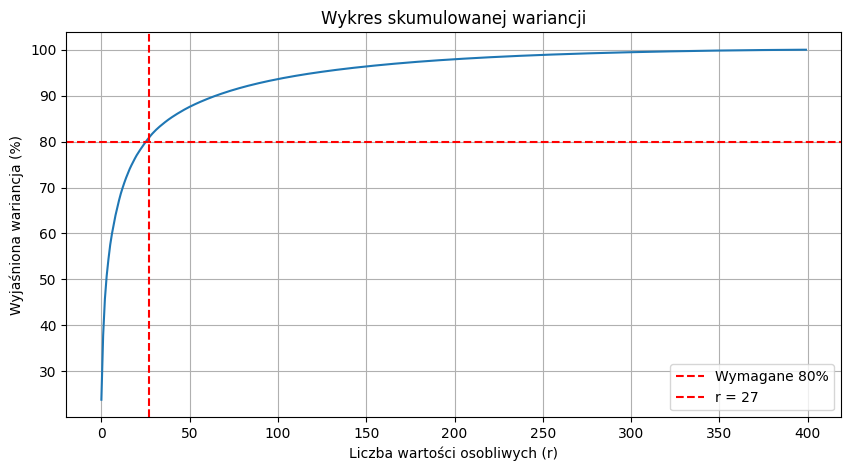

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Konfiguracja dla wariantu 8
k_percent = 80
img_index = 8

# Pobranie danych (Olivetti Faces)
data = fetch_olivetti_faces(shuffle=False)
X = data.data.T # Format: [cechy x próbki]
n_pixels, n_samples = X.shape
h, w = 64, 64

print(f"Wczytano: {n_samples} obrazów, {n_pixels} pikseli każdy.")

# Obliczenie średniej twarzy i centrowanie danych
mean_face = np.mean(X, axis=1, keepdims=True)
X_centered = X - mean_face

# Rozkład SVD
# U zawiera wektory własne (eigenfaces)
U, s, Vt = np.linalg.svd(X_centered, full_matrices=False)

# Obliczenie skumulowanej wariancji i wyznaczenie r
variance_ratio = (s ** 2) / np.sum(s ** 2)
cumulative_variance = np.cumsum(variance_ratio)

# Znalezienie minimalnego r, które pokrywa k% wariancji
r = np.argmax(cumulative_variance >= k_percent / 100.0) + 1

print(f"Dla progu k={k_percent}% wymagana liczba wektorów r = {r}")
print(f"Rzeczywiste pokrycie informacji: {cumulative_variance[r-1]*100:.2f}%")

# Rekonstrukcja wybranego obrazu
Ur = U[:, :r]
test_img = X[:, img_index].reshape(-1, 1)
test_img_centered = test_img - mean_face

# Rzutowanie i powrót
weights = Ur.T @ test_img_centered
reconstructed = (Ur @ weights) + mean_face

# Wizualizacja wyników
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

axes[0].imshow(test_img.reshape(h, w), cmap='gray')
axes[0].set_title(f"Oryginał (idx={img_index})")
axes[0].axis('off')

axes[1].imshow(mean_face.reshape(h, w), cmap='gray')
axes[1].set_title("Średnia twarz")
axes[1].axis('off')

axes[2].imshow(reconstructed.reshape(h, w), cmap='gray')
axes[2].set_title(f"Rekonstrukcja (r={r})")
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Wykres wariancji
plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance * 100)
plt.axhline(y=k_percent, color='r', linestyle='--', label=f'Wymagane {k_percent}%')
plt.axvline(x=r, color='r', linestyle='--', label=f'r = {r}')
plt.xlabel('Liczba wartości osobliwych (r)')
plt.ylabel('Wyjaśniona wariancja (%)')
plt.title('Wykres skumulowanej wariancji')
plt.legend()
plt.grid(True)
plt.show()